<p style="font-family: Arial; font-size:4.05em; color:gold; font-style:bold"><br>
Intelligent Data Analysis</p><br>

## Part II Preprocessing  
Pavol Grofčík  
Dennis Sobolev

In [1]:
#Importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import json as js
import scipy.stats as stats
import re
import statsmodels.api as sm
from sklearn import neighbors
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer

#Filter out warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

%matplotlib inline

<p style="font-family: Arial; font-size:2.95em; color:darkblue; font-style:bold"><br>
Content</p><br>

## Following Sections  


In this Notebook we do repeated analysis after we make new scripts to cleanse and merge our datasets and finally prepare for phase III - **ML using Decision Trees**.  
The sections our notebook include are as follows: 
* __Scripts for merging & cleansing datasets__
* __Real time application of the scripts__
* __Analysis on cleansed dataset with comparison__
* __Description of new columns__
* __Conclusion__

## Part I Scripts for merging & cleansing datasets

In [2]:
#Reading the dataset file and loading it into work environment. Firstly, brief look on a sample.
df_personal = pd.read_csv("Datasets/personal_train.csv", index_col=0)
df_personal.head()

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\r\nPughstad, DC 7...",68.0,M,1949-11-16
1,Edith Boudreaux,"PSC 4657, Box 5446\r\nAPO AP 58412",75.0,F,1943-08-10
2,Stephen Lalk,Unit 9759 Box 9470\r\nDPO AP 45549,67.0,M,1951-05-28
3,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13
4,Janet Washington,"995 Frank Stravenue\r\nSouth Matthewport, TX 8...",65.0,F,1953/06/24


In [3]:
df_other = pd.read_csv("Datasets/other_train.csv", index_col=0)
df_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\r\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\r\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\r\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\r\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,65701 Choi Course Apt. 280\r\nNorth Williamton...,f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


## Merging datasets

It is obvious that both datasets have *name and address* column in common. Then we can merge our datasets to one using pandas built-in function **pd.merge()**

The principle how me merged both datasets is based on **name** and **address** column using *inner* JOIN  
Also we sorted it according the columns to deal with potential duplicates

In [4]:
df_new = pd.merge(df_personal, df_other, on=["name", "address"], how="inner", sort = True, copy = True)

In [5]:
df_new.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,Aaron Johansen,"744 Sandoval Causeway\r\nEast Robertburgh, NC ...",59.0,M,1959-08-05,f,t,Assoc-acdm,f,118.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVHC,12.0,Craft-repair,f,?,White,129
1,Abigail Martinez,"59351 Craig Courts\r\nGordonbury, WI 53797",18.0,F,99-12-09,f,t,Bachelors,f,143.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Exec-managerial,f,?,Black,108
2,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13,f,t,HS-grad,f,95.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,STMW,9.0,Sales,f,?,White,96
3,Abraham Hicks,"031 Wood Wall Apt. 152\r\nVictorburgh, CA 40253",29.0,M,1989-10-04,f,t,Bachelors,f,135.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Adm-clerical,f,?,White,157
4,Ada Jeffries,"66827 Ortiz Radial\r\nWest Justin, IL 04779",70.0,F,48-04-24,f,t,Some-college,f,122.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,Black,144


In [6]:
#Showing the count of rows for each column in the merged dataset
#We can see there are many Nan values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 36 columns):
name                         2287 non-null object
address                      2287 non-null object
age                          2286 non-null float64
sex                          2287 non-null object
date_of_birth                2286 non-null object
query hyperthyroid           2277 non-null object
FTI measured                 2278 non-null object
education                    2280 non-null object
lithium                      2277 non-null object
TT4                          2125 non-null float64
T4U                          2042 non-null float64
capital-loss                 2049 non-null float64
capital-gain                 2282 non-null float64
tumor                        2277 non-null object
TSH                          2040 non-null float64
T3                           1805 non-null float64
fnlwgt                       2279 non-null float64
hours-per-week               2278 n

## Removing duplicates

The way of getting rid of duplicates can be very important, because some of duplicates can **contain specific data** that are not the same in all duplicates rows.  
So our suggested approach is to check column in duplicates that contain Nan values and **fill it using other duplicates**. It can be very time expensive, but for every cons there are pros, and because our dataset is not so big, we can sacrifice some time and possibly extract some new information.

In [7]:
#Let's have a look at one duplicate
df_new[df_new["name"] == "Flora Jackson"].head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
754,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,NaN,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,White,85
755,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",NaN,other,9.0,Adm-clerical,NaN,?,White,85


We have created a **mask** that is a boolean value if the row is or is not duplicate. You may ask why we sort new merged dataset and voila this is why. Pandas function *duplicated* needs to have **sorted dataset** to find duplicates using specific subset of columns 

In [8]:
mask = df_new.duplicated(subset=["name", "address"])

In [9]:
#Showing first rows on dataset in mask
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
#The we assign all found duplicates
duplicates = df_new[mask == True]

In [11]:
#Showing found duplicates based on name & address
duplicates.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
44,Alice Stein,"910 Peterson Flats Suite 519\r\nSouth Donald, ...",27.0,F,1991-02-25 00 00 00,f,t,Some-college,f,272.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,other,10.0,Sales,f,?,Black,NaN
101,Angelica Dowd,"990 Dana Plaza Apt. 875\r\nLake Maryberg, AZ 7...",20.0,F,1998-02-28 00 00 00,f,t,HS-grad,f,93.0,...,NaN,"{'query hypothyroid':'f','T4U measured':'t','p...",t,other,9.0,Adm-clerical,f,?,White,93
110,Ann Hernandez,"87511 Raven Falls Apt. 369\r\nNew Brian, AZ 19649",34.0,F,1984-09-05,f,t,Bachelors,f,96.0,...,f,NaN,NaN,other,-1300.0,Adm-clerical,f,NaN,Black,90
162,Arlene Smith,"574 Shelton Loop\r\nEast Nicholas, KY 33054",40.0,F,1978-04-20 00 00 00,f,t,NaN,f,112.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,9.0,Prof-specialty,f,?,Black,90
309,Carmela Respress,"656 Stevenson Springs\r\nLake Audreyview, MO 0...",68.0,F,1950-01-22,f,NaN,Some-college,f,NaN,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,113


In [12]:
print("Number of found duplicates %d" % (len(duplicates)))

Number of found duplicates 50


In [13]:
#The we determine index of duplicates
indexes = duplicates.index

In [14]:
#Here is a function that gets rid off duplicates and keeps data from other duplicates
def fill_from_duplicates(df, duplicates, indexes):
    """ This is function that get rid off duplicates in 
        dataframe df on indices indexes
    """
    
    indexes = indexes.tolist()
    
    #Iterating row by row
    for i in range(0, len(df)):
        if((i+1) == indexes[0]):
            
           #For Nan column we search over all duplicates to fill proper value
            for col in df.columns:
                if (pd.isnull(df.at[i,col]) or df.at[i,col] == "?"):
                    df.at[i,col] = df.at[i+1,col]
            
            indexes.pop(0)
            
            #Then we drop the duplicated row
            df.drop(i+1, inplace = True)
            if(len(indexes) == 0):
                #At the end we reset index
                df_new.reset_index(drop=True,inplace=True)
                print("Done")
                break

In [15]:
#This is informative - take a look on column "on antithyroid medication" 
#You can see that duplicates do not have the same data
df_new[df_new["name"] == "Flora Jackson"]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
754,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,NaN,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,White,85
755,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",NaN,other,9.0,Adm-clerical,NaN,?,White,85


In [16]:
#Now we have all ready to delete duplicates
fill_from_duplicates(df_new, duplicates, indexes)

Done


After the finished process of deduplication let's have a look at the record for a control

In [17]:
df_new[df_new["name"] == "Flora Jackson"]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
741,Flora Jackson,"4798 Carter Turnpike\r\nJosemouth, WV 19340",39.0,F,1979-02-26 00 00 00,t,t,HS-grad,f,84.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,White,85


## Date normalization

As you have certainly noticed there are many different formats for date of birth.  In this step we normalize it to one format. 

In [18]:
df_new["date_of_birth"].head()

0    1959-08-05
1      99-12-09
2    1984-02-13
3    1989-10-04
4      48-04-24
Name: date_of_birth, dtype: object

In [19]:
#Here is a simle function that normalize it on format as follows
def format_date(date):
    if not isinstance(date, str):
        return date
    date=date.split(' ', 1)[0]
    x=re.findall(r"[\w']+", date)
    for i in x:
        year=0
        day=0
        if int(i)>31:
            year=x.index(i)
        elif int(i)>12:
            day=x.index(i)
        if year==2:
            x[0], x[2] = x[2],x[0]
        date='-'.join(x)
    return date

In [20]:
#Applying to normalize dates
df_new['date_of_birth']=df_new['date_of_birth'].apply(lambda x: format_date(x))
df_new.head()

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,Aaron Johansen,"744 Sandoval Causeway\r\nEast Robertburgh, NC ...",59.0,M,1959-08-05,f,t,Assoc-acdm,f,118.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVHC,12.0,Craft-repair,f,?,White,129
1,Abigail Martinez,"59351 Craig Courts\r\nGordonbury, WI 53797",18.0,F,99-12-09,f,t,Bachelors,f,143.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Exec-managerial,f,?,Black,108
2,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13,f,t,HS-grad,f,95.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,STMW,9.0,Sales,f,?,White,96
3,Abraham Hicks,"031 Wood Wall Apt. 152\r\nVictorburgh, CA 40253",29.0,M,1989-10-04,f,t,Bachelors,f,135.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,13.0,Adm-clerical,f,?,White,157
4,Ada Jeffries,"66827 Ortiz Radial\r\nWest Justin, IL 04779",70.0,F,48-04-24,f,t,Some-college,f,122.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,Black,144


## Parsing JSON 


In dataset there is a JSON format in the column **medical_info**. Moreover, this JSON holds some **new information**, so we needed to parse and add this new information as new columns

In [21]:
#One example of JSON format
df_new["medical_info"][0]

"{'query hypothyroid':'f','T4U measured':'t','pregnant':'f','thyroid surgery':'f','TSH measured':'t','query on thyroxine':'f','I131 treatment':'f','on thyroxine':'f','T3 measured':'t','psych':'f'}"

All those columns inside JSON are binary and mostly duplicate those, which we already have as numeric values. But there are at least two interesting ones there:
> **Pregnant** - is crucial to determine the normal level of hormones for women, because during pregnancy thyroid hormones values are significantly higher than usual.  
> **I131 treatment** - determines whether or not patient is taking Iodine-131 procedures to get rid of thyroid tumor etc. This column mostly doesn't have influence on overall diagnosis, but may be interesting for some data statistics.  
> **Psych** - presumably psychic disbalance, caused by thyroid problems, and possibly psychic medication. Could be interesting.  
> **Thyroid surgery** - whether or not a patient had surgical operations, related to thyroid problems.  


Below is a script that parse JSON and add  **new columns** to the dataset with the values

In [22]:
#Function returns dictionary keys
def dict_keys(dictionary):
    if (dictionary == None):
        return None
    
    keys = []
    
    for key in dictionary:
        keys.append(key)
        
    return keys

In [23]:
#Function returns dictionary values
def dict_values(dictionary):
    if(dictionary == None):
        return None
    
    values = []
    
    for key in dictionary:
        val = dictionary[key]
        values.append(val)
        
    return values

In [24]:
#Function returns dictionary from JSON format
def parse_json_col(med_info = None):
    
    if(med_info == None):
        return None
    
    med_info = med_info.strip("{}")  #Remove {}
    med_info = med_info.split(",")   #Separate into list by "," as a delimiter
    
    new = []
    
    for k in med_info:
        a,b = k.split(":")
        new.append(a.strip("'"))
        new.append(b.strip("'"))
        
    final = dict(new[i:i+2] for i in range(0,len(new),2))
    
    return final

In [25]:
#Final Function that creates new parsed columns
def add_columns(data = None, json_col = None):
    
    if (data[json_col].empty or json_col == None):
        return None
    
    #Creating empty columns from JSON row that we fill with values
    dictionary = parse_json_col(data[json_col][0])
    keys = dict_keys(dictionary)
    
    #New empty dataframe
    new = pd.DataFrame(columns=keys,index=range(len(data)))
    
    #Iteration over new dataframe and filling
    counter = 0
    for json in data[json_col]:
        try:
            if(np.isnan(json)):
                counter += 1
                new.loc[counter] = np.NaN
                continue
        except:
            pass

        json = parse_json_col(json)
        new.loc[counter] = dict_values(json)
        counter += 1

    
    cols = len(new.columns)
    
    for i in range(cols):
        col = new.pop(new.columns[0])
        name = keys[i]

        data[name] = col

    #New filled dataframe
    return data

In [26]:
#Parsing & adding new columns to the dataset
df_new= add_columns(data=df_new,json_col="medical_info")
df_new[df_new.columns[15:]].head()

,T3,fnlwgt,hours-per-week,relationship,sick,workclass,TT4 measured,class,marital-status,goitre,...,query hypothyroid,T4U measured,pregnant,thyroid surgery,TSH measured,query on thyroxine,I131 treatment,on thyroxine,T3 measured,psych
0,2.0,240810.0,45.0,Husband,f,private,t,negative.|511,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
1,3.0,55743.0,45.0,Wife,f,Private,t,increased binding protein.|1799,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
2,2.0,193868.0,50.0,Not-in-family,f,Self-emp-inc,t,negative._2741,Never-married,f,...,f,t,f,f,t,f,f,f,t,f
3,1.6,119069.0,40.0,Husband,f,Self-emp-not-inc,t,negative.|542,Married-civ-spouse,f,...,f,t,f,f,t,f,f,f,t,f
4,1.8,195189.0,40.0,Unmarried,f,Private,t,negative.|72,Divorced,f,...,f,t,f,f,t,f,f,f,t,f


## Normalization of categorical columns


In [27]:
def normalize_identifiers(data, column):

    if(data[column].isna().any()):
        new_col = data[column].copy()
        
        for i in range(0,len(new_col)):
            if(pd.isna(new_col.iloc[i])):
                continue
            else:
                new_col.iloc[i] = new_col.iloc[i].lower()[0]
        data[column] = new_col.copy()
    else:
        data[column] = data[column].apply(lambda x : x.lower())
        data[column] = data[column].apply(lambda x :  x.replace(x,x[0]))
        data[data[column] == 'n'][column] = np.nan

In [28]:
def normalize_columns_booleans(data):
    
    """ The function normalize columns in dataframe 
        data, that contains values such as t.8,f.2...
        to the format t/f
        This function do nothing with Nan values
    """
    
    #iterating over the columns
    for col in df_new.columns:
  
        a = pd.unique(df_new[col])
        
        #List of valid values for normalization
        flags = ["f","t", "t.[0-9]", "f.[0-9]"]

        for item in a:

            #Normalization of values
            if(item in flags):
                normalize_identifiers(data=data,column=col)
                print("Normalized %s" % (col))
                break

Now let's take a look on a column with the categorical values - **on antithyroid medication**

In [29]:
df_new["on antithyroid medication"].unique()

array(['f', 'FALSE', 'F', 't', 'TRUE', 'T', 'f.2'], dtype=object)

In [30]:
#Applying normalization to the categorical column
normalize_identifiers(df_new, "on antithyroid medication")

In [31]:
#After applying the normalization script, there are only two valid values
df_new["on antithyroid medication"].unique()

array(['f', 't'], dtype=object)

## Normalization of special column

Preprocessing a **class** column  
This column contains two kind of information and it is suitable to split the column on **two new** columns.

In [32]:
df_new["class"].head()

0                      negative.|511
1    increased binding protein.|1799
2                     negative._2741
3                      negative.|542
4                       negative.|72
Name: class, dtype: object

In [33]:
#Stripping characters
df_new["class"] = df_new["class"].str.replace("_","")
df_new["class"] = df_new["class"].str.replace("|","")
df_new["class"].head()

0                      negative.511
1    increased binding protein.1799
2                     negative.2741
3                      negative.542
4                       negative.72
Name: class, dtype: object

In [34]:
#Finally, splitting the column on two new columns - class and protein
df_new[["class", "class_num"]] = df_new["class"].str.split(".",expand = True)
df_new[["class", "class_num"]].head()

,class,class_num
0,negative,511
1,increased binding protein,1799
2,negative,2741
3,negative,542
4,negative,72


## Fillling missing numeric values

In [35]:
def fill_numeric_miss_values(data,column,method):
    
    """ The function fills missing numeric values
        with specific method. Method includes
        mean/med/mod.
    """
    methods = ["mean","med","mod"]
    
    if (data[column].isna().any() == False):
        #Stĺpec neobsahuje žiadne NaN hodnoty
        print("No missing values!")
        return
    
    #Creating a mask
    mask = data[column].isna()
    
    #Method check
    if(method not in methods):
        print("Invalid method")
        return
    
    #Determination of method
    if (method == "mean"):
        col = data[column]
        col = col[mask == False]
        value = np.mean(col)
        print(str.upper(method)," Value is:", value)
        
    elif (method == "med"):
        col = data[column]
        col = col[mask == False]
        value = col.mean()
        print(str.upper(method)," Value is:", value)

    elif (method == "mod"):
        col = data[column]
        col = col[mask == False]
        value = col.mode()[0]
        print(str.upper(method)," Value is:", value)

    #Replacing the missing value with the calculated one
    new_col = data[column].copy()
    for i in range(0,len(new_col)):

        if(pd.isna(new_col.iloc[i])):
            new_col.iloc[i] = value
   
    data[column] = new_col.copy()
    data[column] = data[column].astype("float64")
    
    print("Filling missing values by %s done!" % (str.upper(method)))

In [36]:
# Sample of NaN values
df_new[np.isnan(df_new["TT4"]) == True]

,name,address,age,sex,date_of_birth,query hyperthyroid,FTI measured,education,lithium,TT4,...,T4U measured,pregnant,thyroid surgery,TSH measured,query on thyroxine,I131 treatment,on thyroxine,T3 measured,psych,class_num
5,Ada Wells,"906 Booth Mews\r\nJohnsonmouth, IL 11134",41.0,F,76-11-26,f,f,HS-grad,f,NaN,...,f,f,f,f,f,f,f,f,f,1816
28,Albert Picklesimer,"547 Victoria Road Apt. 194\r\nNorth Dominique,...",68.0,M,1949-12-06,f,f,Some-college,f,NaN,...,f,f,f,t,f,f,f,f,f,394
40,Alice Bush,"3994 Craig Square\r\nPort Edwinview, TX 92630",77.0,F,1940-12-07,f,f,HS-grad,f,NaN,...,f,f,f,f,f,f,f,t,f,276
44,Alicia Johnson,"7099 Smith Fields Apt. 324\r\nWest Jocelynton,...",51.0,F,1967-02-15,f,t,7th-8th,f,NaN,...,f,f,f,t,f,f,f,t,f,3304
51,Allison Aderholt,"478 Murphy Divide\r\nSouth Christopher, IA 99523",67.0,F,1951-07-01,f,f,Bachelors,f,NaN,...,f,f,f,f,f,f,f,f,f,1902
63,Amanda Davis,"6630 Brian Views\r\nElliottberg, IN 75451",22.0,F,1996-06-17,f,f,5th-6th,f,NaN,...,f,f,f,f,f,f,f,f,f,664
67,Amanda Moss,"841 James Alley\r\nPort Thomas, ID 71619",62.0,F,1956-10-01,f,f,HS-grad,f,NaN,...,f,f,f,f,f,f,f,f,f,1901
90,Angela Chavez,"46320 Cassie Trail Suite 868\r\nMatthewville, ...",49.0,F,69-09-20,f,f,HS-grad,f,NaN,...,f,f,f,f,f,f,f,f,f,454
106,Ann Hensley,"159 Jefferson Mews\r\nWest Rodney, WI 31709",33.0,F,1985-04-10,f,f,HS-grad,f,NaN,...,f,f,f,f,f,f,f,f,f,2804
123,Anne Estrada,"58334 Paul Hollow Suite 812\r\nDanielsstad, MA...",41.0,F,1977-08-03,f,f,Bachelors,f,NaN,...,f,f,f,f,f,f,f,f,f,3519


In [37]:
example = df_new[["TT4", "TT4 measured"]].copy()
fill_numeric_miss_values(example, "TT4", "mean")

MEAN  Value is: 109.32809956917185
Filling missing values by MEAN done!


In [38]:
#Check if all NaN values are filled
example[np.isnan(example["TT4"]) == True].head()

,TT4,TT4 measured


## Dealing with the outliers

###  I. Deleting outliers and replacing with Nan

In [39]:
example = df_new["class_num"].copy()
example = example.apply(lambda x: float(x))

In [40]:
#Function that deletes outliers using boundary quartiles
#By deletion we mean converting to as Nan values
def normalize(data):
    #q1 = data.quantile(0.05) - 1.5 * stats.iqr(data)
    #q2 = data.quantile(0.95) + 1.5 * stats.iqr(data)
    
    q1 = data.quantile(0.05)
    q2 = data.quantile(0.95)
    
    mask_q1 = (data < q1)
    mask_q2 = (data > q2)
    
    data[mask_q1] = np.NaN
    data[mask_q2] = np.NaN
    
    #We return a new normalized column
    return data

In [41]:
example.dropna().describe()

count    2237.000000
mean     1901.565937
std      1092.242217
min         1.000000
25%       960.000000
50%      1921.000000
75%      2836.000000
max      3772.000000
Name: class_num, dtype: float64

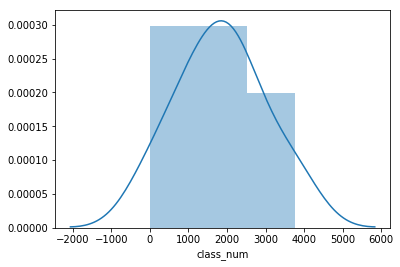

In [42]:
sns.distplot(example.dropna().describe())

In [43]:
example = normalize(example)

In [44]:
example.describe()

count    2013.000000
mean     1903.029309
std       982.767259
min       188.000000
25%      1062.000000
50%      1921.000000
75%      2737.000000
max      3596.000000
Name: class_num, dtype: float64

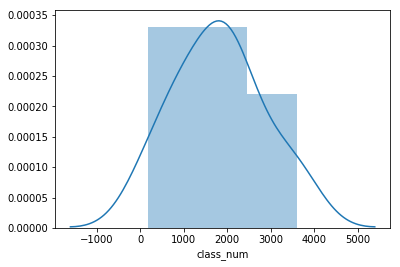

In [45]:
sns.distplot(example.dropna().describe())

There is a small difference as result having more missing values (Nan) including outliers **< 0.05** and **> 0.95**

### II. Replacing outliers with quantiles 

In [46]:
ex = df_new["class_num"].copy()

In [47]:
#It also works on Nan values, because Nan is special kind of float
ex = ex.apply(lambda x: float(x))

In [48]:
#Function that normalize outliers with boundary quantiles 5% 95 %
def normalize_quantiles(column):
    column = column.apply(lambda x: float(x))
    
    if isinstance(column[0],str):
        print("Not numeric column!")
        return
    else:
        #We determine quantiles
        low = column.quantile(0.05)
        high = column.quantile(0.95)
        
        lmask = (column < low)
        hmask = (column > high)
        
        column[lmask] = column.median()
        column[hmask] = column.median()
        
        return column

In [49]:
a = ex.copy()
b = normalize_quantiles(ex)

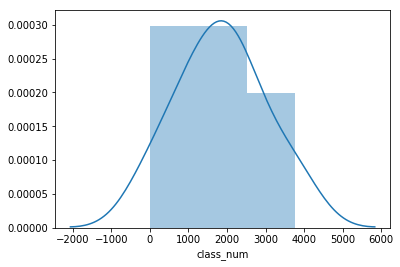

In [50]:
sns.distplot(a.dropna().describe())

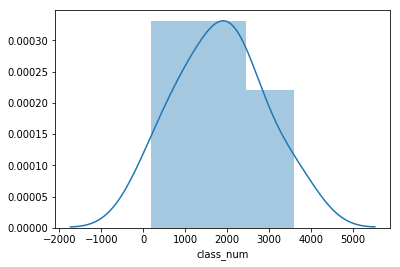

In [51]:
sns.distplot(b.dropna().describe())

There is a difference in data distribution. After this type of normalization our data distribution are more evenly distributed resulting in **smooth slope**.

### III. Logarithmic Transformation of the outliers

In [52]:
#Function that transforms outliers by logaritm with base e
def log_transformation(column):
    low = column.quantile(0.05)
    high = column.quantile(0.95)
    med = column.quantile(0.5)
    
    lmask = (column < low)
    hmask = (column > high)
    
    low = np.power(low,np.log(med)/np.log(low))
    high = np.power(high,np.log(med)/np.log(high))
    
    #For values that outliers quantile we apply logarithmic transformation to median
    column[lmask] = low
    column[hmask] = high
    
    return column
    

### IV. Logical transformation of the outliers

Is applied only to **education-num** column, because its outliers can be defined by the algorithm, described in the analysis during the first stage of the project. Here we may use both aggregate functions with a dictionary (similarly to the normalization script for modus values, but a bit more tricky), and also we may use a mathematical operation: **abs(outlier_value/100)**.

In [53]:
import scipy.stats as stats
l=df_new[['education','education-num']].groupby(['education']).agg(lambda x: int(stats.mode(x)[0]))
l=l.reset_index()
ed_dict=l.groupby('education')['education-num'].apply(int).to_dict()
indices=[]

for i,row in df_new.iterrows():
    if row['education-num'] not in l['education-num'] and pd.isnull(row['education'])==False:
        indices.append(i)
        
for i in indices:
    df_new.ix[i,'education-num']=ed_dict[df_new.ix[i,'education']]
    #Alternate way, sometimes functions incorrect, so complex modus function was used:
    #df_new.ix[i,'education-num']=abs(df_new.ix[i,'education-num']/100)

Logical transformation also applies to **pregnant**, because this column is fully dependent from patient's sex and age - there were occurrences, when women were pregnant in the age of 12, but all lower age boundaries are too rare to consider them truthful for our particular task:

In [54]:
indices=[]
for i,row in df_new.iterrows():
    if (row['sex']=='m' and row['pregnant']=='t') or (row['age']<12 and row['pregnant']=='t'):
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'pregnant']='f'

## Deleting spaces and tolower categorical values

There are some columns that have not integrated values such as **workclas** with values *'private', ' Private'*. It could be
problem when we permorm analysis of these columns, because the data is **dirty**.

In [55]:
#Let's look at workclass column
df_new["workclass"].unique()

array(['private', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', nan,
       'self-emp-not-inc', ' State-gov', '??', ' ?', ' Local-gov', '?',
       'Nan', ' Federal-gov', 'local-gov', 'federal-gov', ' Without-pay',
       'self-emp-inc', 'state-gov'], dtype=object)

In [56]:
#Function that normalize categorical column in way of lower case
#and delimiting spaces
def format_categorical(column):
    length = len(column)
    
    for i in range(0,length):
        if (pd.isna(column[i])):
            continue
        else:
            val = column[i]
            val = val.lower()
            column[i] = " ".join(val.split())

    return column

In [57]:
df_new["workclass"] = format_categorical(df_new["workclass"].copy())

In [58]:
df_new["workclass"].unique()

array(['private', 'self-emp-inc', 'self-emp-not-inc', nan, 'state-gov',
       '??', '?', 'local-gov', 'nan', 'federal-gov', 'without-pay'],
      dtype=object)

In [59]:
#Before normalization there is a space in the begginig of string
df_new["education"].unique()

array([' Assoc-acdm', ' Bachelors', ' HS-grad', ' Some-college',
       ' Masters', ' Prof-school', ' 10th', ' 11th', ' 7th-8th',
       ' Assoc-voc', ' Doctorate', ' 5th-6th', ' 12th', ' 9th',
       ' 1st-4th', ' Preschool'], dtype=object)

In [60]:
df_new["education"] = format_categorical(df_new["education"].copy())

In [61]:
#After normalization all values are lower case without useless spaces
df_new["education"].unique()

array(['assoc-acdm', 'bachelors', 'hs-grad', 'some-college', 'masters',
       'prof-school', '10th', '11th', '7th-8th', 'assoc-voc', 'doctorate',
       '5th-6th', '12th', '9th', '1st-4th', 'preschool'], dtype=object)

## V. Linear regression - Dealing with missing values for important correlational data

As we mentioned during the first stage of our project, there are not so many columns, that directly correlate with each other or affect the diagnosis we will look for in further stage.
In order to find out, which columns are important, we will use our heatmap as we have done before: 

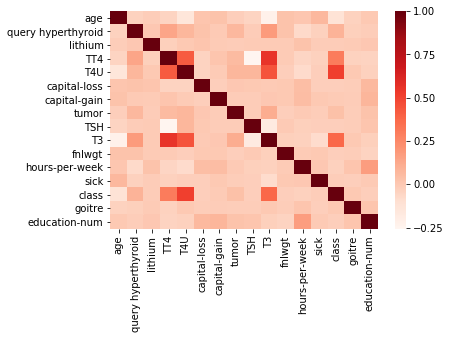

In [62]:
df_corr=df_new.copy()
d = {'negative' : 0, 'increased binding protein' : 1, 'decreased binding protein' : -1}
f = {'f' : 0, 't' : 1}
df_corr['class']=df_corr['class'].map(d)
df_corr['tumor']=df_corr['tumor'].dropna().map(f)
df_corr['goitre']=df_corr['goitre'].dropna().map(f)
df_corr['sick']=df_corr['sick'].dropna().map(f)
df_corr['lithium']=df_corr['lithium'].dropna().map(f)
df_corr['query hyperthyroid']=df_corr['query hyperthyroid'].dropna().map(f)
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, cmap='Reds')

The values we will seek for in futher stage are the values of **class** column. And as far as we see, the most significant influence on this column does **T4U** category. Less significant, but still visible influence do also have **T3** and **TT4** columns.
Those 3 are columns with hormone measurements and the have a certain dependency between each other:
> **TT4** is the total level of T4 hormone  
> **T4U** is the unbound part of T4 hormone  
> **T3** is the hormone, which is produced outside the thyroid gland and is mostly synthesized from **T4**  
> **TSH**, which has _**negative**_ correlation with **TT4** and **T3** the hormone, which stimulates the production of **T4**, but due to the fact that correlation is rather weak, we will focus on previous three hormones.  

The most logical is to try and make a linear regression between those 3 hormones in order to fill missing values with the closest possible logical value _(but such approach may lead to significant consequences, because exactly the strange difference between hormone levels is often an important sign of possible illness, and by using linear regression, we approximate those values, thus making it possible for our future prediction model to fail and doom someone to wrong diagnosis)_.



In [63]:
#Some preparations for regression and mask to extract only those rows, which contain all significant hormone values
n = Normalizer()
regr = linear_model.LinearRegression()
ridg = linear_model.Ridge(alpha=.5)

lregr_mask = (pd.isnull(df_new['TT4'])==False)& (pd.isnull(df_new['T3'])==False)& (pd.isnull(df_new['T4U'])==False)
t3_tt4_mask= (pd.isnull(df_new['T3'])==False) & (pd.isnull(df_new['TT4'])==True)
t3_t4u_mask= (pd.isnull(df_new['T3'])==False) & (pd.isnull(df_new['T4U'])==True)

tt4_t3_mask= (pd.isnull(df_new['T3'])==True) & (pd.isnull(df_new['TT4'])==False)
tt4_t4u_mask= (pd.isnull(df_new['T4U'])==True) & (pd.isnull(df_new['TT4'])==False)

t4u_tt4_mask= (pd.isnull(df_new['T4U'])==False) & (pd.isnull(df_new['TT4'])==True)
t4u_t3_mask= (pd.isnull(df_new['T4U'])==False) & (pd.isnull(df_new['T3'])==True)

### Linear regression for T4U-T3

1) OLS:
Regression coefficient: 
 [1.86670459]
Mean squared error: 0.54
R2 (variance) score: 0.20

2) Ridge:
Regression coefficient: 
 [1.85223268]
Mean squared error: 0.54
R2 (variance) score: 0.20


X(min/max):  0.31 2.12
Y(min/max):  0.05 10.6


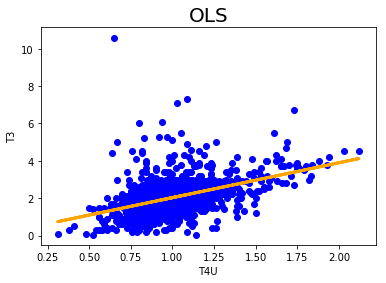

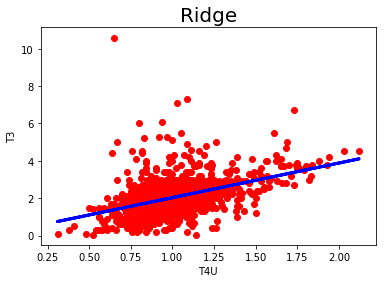

In [64]:
############################ T4U-T3 ########################################

x=df_new[lregr_mask][['T4U']].copy()
x=x['T4U'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['T3']].copy()
y=y['T3'].apply(lambda x: float(x))

x_pred=df_new[t4u_t3_mask][['T4U']].copy()
x_pred=x_pred['T4U'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))


# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

t4u_t3_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('T4U')
plt.ylabel('T3')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('T4U')
plt.ylabel('T3')
plt.title('Ridge', fontsize=20)

plt.show()

### Linear regression for T3-T4U (reversal filling)

1) OLS:
Regression coefficient: 
 [0.10659721]
Mean squared error: 0.03
R2 (variance) score: 0.20

2) Ridge:
Regression coefficient: 
 [0.10654967]
Mean squared error: 0.03
R2 (variance) score: 0.20


X(min/max):  0.05 10.6
Y(min/max):  0.31 2.12


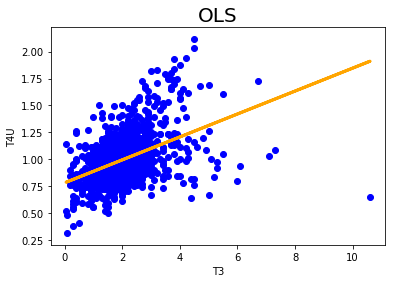

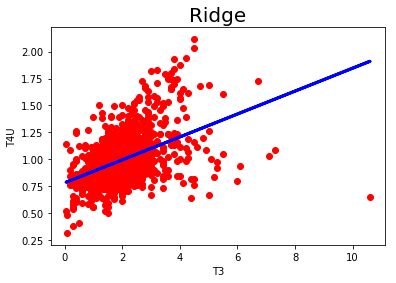

In [65]:
############################ T4U-T3 ########################################

x=df_new[lregr_mask][['T3']].copy()
x=x['T3'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['T4U']].copy()
y=y['T4U'].apply(lambda x: float(x))

x_pred=df_new[t3_t4u_mask][['T3']].copy()
x_pred=x_pred['T3'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))

# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

t3_t4u_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('T3')
plt.ylabel('T4U')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('T3')
plt.ylabel('T4U')
plt.title('Ridge', fontsize=20)

plt.show()

### Linear regression for TT4-T3

1) OLS:
Regression coefficient: 
 [0.0133477]
Mean squared error: 0.45
R2 (variance) score: 0.34

2) Ridge:
Regression coefficient: 
 [0.01334769]
Mean squared error: 0.45
R2 (variance) score: 0.34


X(min/max):  2.0 430.0
Y(min/max):  0.05 10.6


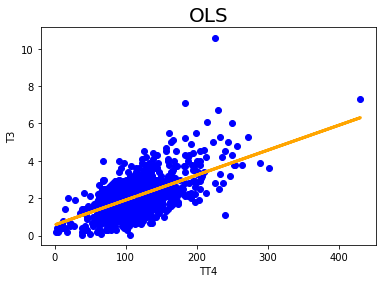

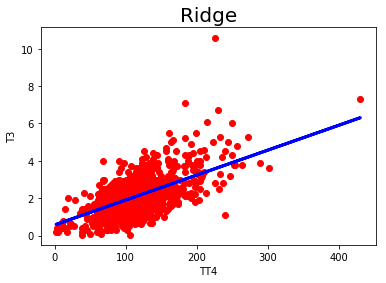

In [66]:
########################## TT4-T3 ######################################

x=df_new[lregr_mask][['TT4']].copy()
x=x['TT4'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['T3']].copy()
y=y['T3'].apply(lambda x: float(x))

x_pred=df_new[tt4_t3_mask][['TT4']].copy()
x_pred=x_pred['TT4'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))


# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

tt4_t3_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('TT4')
plt.ylabel('T3')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('TT4')
plt.ylabel('T3')
plt.title('Ridge', fontsize=20)

plt.show()


### Linear regression for T3-TT4 (reversal)

1) OLS:
Regression coefficient: 
 [25.22445556]
Mean squared error: 845.73
R2 (variance) score: 0.34

2) Ridge:
Regression coefficient: 
 [25.21320618]
Mean squared error: 845.73
R2 (variance) score: 0.34


X(min/max):  0.05 10.6
Y(min/max):  2.0 430.0


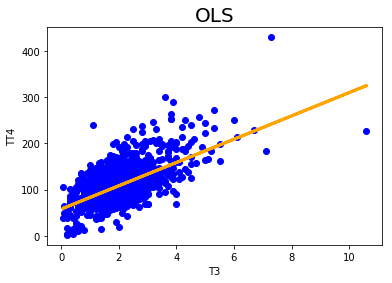

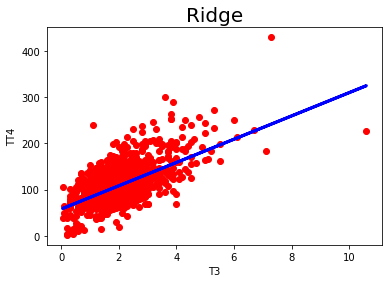

In [67]:
########################## T3-TT4 ######################################

x=df_new[lregr_mask][['T3']].copy()
x=x['T3'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['TT4']].copy()
y=y['TT4'].apply(lambda x: float(x))

x_pred=df_new[t3_tt4_mask][['T3']].copy()
x_pred=x_pred['T3'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))

# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x,y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

t3_tt4_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('T3')
plt.ylabel('TT4')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('T3')
plt.ylabel('TT4')
plt.title('Ridge', fontsize=20)

plt.show()


### Linear regression for TT4-T4U

1) OLS:
Regression coefficient: 
 [0.00241139]
Mean squared error: 0.03
R2 (variance) score: 0.19

2) Ridge:
Regression coefficient: 
 [0.00241139]
Mean squared error: 0.03
R2 (variance) score: 0.19


X(min/max):  2.0 430.0
Y(min/max):  0.31 2.12


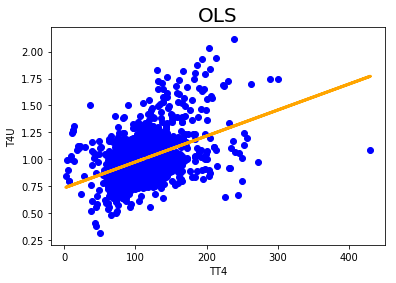

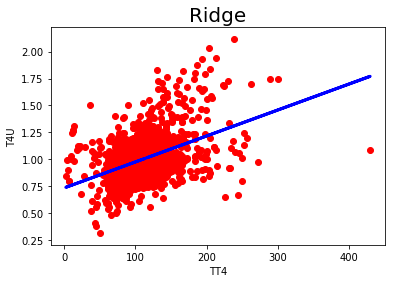

In [68]:
########################## TT4-T4U ######################################

x=df_new[lregr_mask][['TT4']].copy()
x=x['TT4'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['T4U']].copy()
y=y['T4U'].apply(lambda x: float(x))

x_pred=df_new[tt4_t4u_mask][['TT4']].copy()
x_pred=x_pred['TT4'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))


# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x,y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

tt4_t4u_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title('Ridge', fontsize=20)

plt.show()


### Linear regression for T4U-TT4 (reversal)

1) OLS:
Regression coefficient: 
 [79.80183069]
Mean squared error: 1029.66
R2 (variance) score: 0.19

2) Ridge:
Regression coefficient: 
 [79.18315464]
Mean squared error: 1029.67
R2 (variance) score: 0.19


X(min/max):  0.31 2.12
Y(min/max):  2.0 430.0


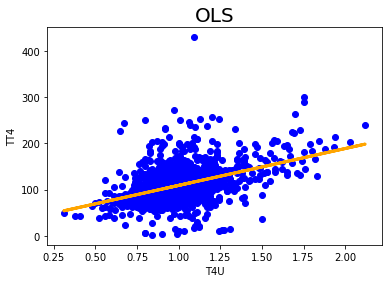

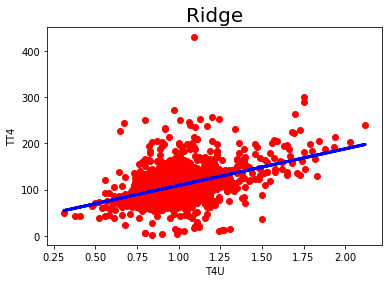

In [69]:
########################## T4U-TT4 ######################################

x=df_new[lregr_mask][['T4U']].copy()
x=x['T4U'].apply(lambda x: float(x))
x=x.values.reshape((-1,1))

y=df_new[lregr_mask][['TT4']].copy()
y=y['TT4'].apply(lambda x: float(x))

x_pred=df_new[t4u_tt4_mask][['T4U']].copy()
x_pred=x_pred['T4U'].apply(lambda x: float(x))
x_pred=x_pred.values.reshape((-1,1))

# Train the model using the training sets
regr.fit(x, y)
ridg.fit(x,y)

# Make predictions using the testing set
y_pred = regr.predict(x)
y_ridgepred = ridg.predict(x)

t4u_tt4_pred=regr.predict(x_pred)

# The coefficients, MSE, R2:
print("1) OLS:")
print('Regression coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('R2 (variance) score: %.2f' % r2_score(y, y_pred))

print("\n2) Ridge:")
print('Regression coefficient: \n', ridg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_ridgepred))
print('R2 (variance) score: %.2f' % r2_score(y, y_ridgepred))

#Min-max values for x and y
print('\n')
print("X(min/max): ",x.min(),x.max())
print("Y(min/max): ",y.min(),y.max())

# OLS linear regression plot
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='orange', linewidth=3)
plt.xlabel('T4U')
plt.ylabel('TT4')
plt.title('OLS', fontsize=20)

plt.show()

# Ridge linear regression plot
plt.scatter(x, y,  color='red')
plt.plot(x, y_ridgepred, color='blue', linewidth=3)
plt.xlabel('T4U')
plt.ylabel('TT4')
plt.title('Ridge', fontsize=20)

plt.show()


We created linear regression models for each pair of significant hormones, so in real model we may be able to fill the missing values in each column step by step, depending on existing ones.

As we may also see, most adequate model is trained for the pair of **TT4** to **T3** correlation, hereby confirming our conclusion from the heatap, where TT4-T3 correlation was the strongest.

## Part II Real time application of the scripts

In this section we **apply our methods** for dealing with missing values and outliers to dataset and then do analysis on these columns and compare results with previous analysis.
Preprocessing steps are as follows:  
* __Filling missing values with chosen method__  
* __Dealing with outliers using quantile normalization__
* __Do statistical test an compare results__

In [70]:
#Applied to categorical columns
normalize_columns_booleans(data=df_new)

Normalized query hyperthyroid
Normalized FTI measured
Normalized lithium
Normalized tumor
Normalized sick
Normalized TT4 measured
Normalized goitre
Normalized hypopituitary
Normalized on antithyroid medication
Normalized TBG measured
Normalized query hypothyroid
Normalized T4U measured
Normalized pregnant
Normalized thyroid surgery
Normalized TSH measured
Normalized query on thyroxine
Normalized I131 treatment
Normalized on thyroxine
Normalized T3 measured
Normalized psych


### Applying trained linear regression to fill missing values in all hormone columns

In [71]:
############# T3-T4U #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T3)==False and pd.isnull(row.T4U)==True:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'T4U']=t3_t4u_pred[x]
    x+=1


In [72]:
############# T3-TT4 #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T3)==False and pd.isnull(row.TT4)==True:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'TT4']=t3_tt4_pred[x]
    x+=1


In [73]:
############# TT4-T3 #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T3)==True and pd.isnull(row.TT4)==False:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'T3']=tt4_t3_pred[x]
    x+=1

In [74]:
############# TT4-T4U #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T4U)==True and pd.isnull(row.TT4)==False:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'T4U']=tt4_t4u_pred[x]
    x+=1

In [75]:
############# T4U-T3 #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T4U)==False and pd.isnull(row.T3)==True:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'T3']=t4u_t3_pred[x]
    x+=1

In [76]:
############# T4U-TT4 #############
indices=[]
x=0
for i,row in df_new.iterrows():
    if pd.isnull(row.T4U)==False and pd.isnull(row.TT4)==True:
        indices.append(i)
        
for i in indices:    
    df_new.ix[i,'TT4']=t4u_tt4_pred[x]
    x+=1

In [77]:
#For statistical hypothesis we will use three columns - TSH,T3,T4U

### Filling missing values

We try to use our techniques on hormone columns and then we do **analysis and statistical hypothesis** on these columns.

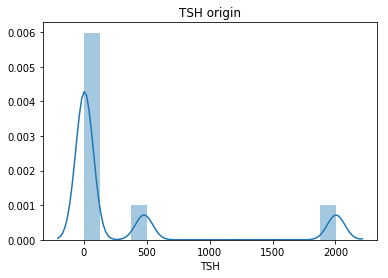

In [78]:
plt.title("TSH origin")
sns.distplot(df_new["TSH"].describe())

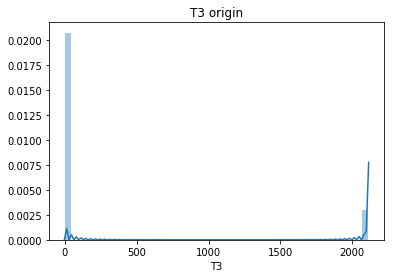

In [79]:
plt.title("T3 origin")
sns.distplot(df_new["T3"].describe())

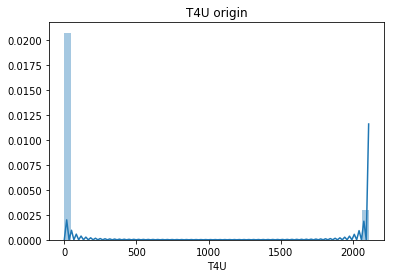

In [80]:
plt.title("T4U origin")
sns.distplot(df_new["T4U"].describe())

In [81]:
#There are many outliers, so we need to fill it and normalize it

In [82]:
ex = df_new[["TSH", "T3", "T4U", "class"]].copy()

### Before normalization

In [83]:
ex.isna().any()

TSH       True
T3        True
T4U       True
class    False
dtype: bool

In [84]:
ex.describe()

,TSH,T3,T4U
count,2005.000000,2110.000000,2110.000000
mean,4.501820,2.034227,0.996110
std,20.328561,0.771171,0.187295
min,0.005000,0.050000,0.310000
25%,0.440000,1.600000,0.880000
50%,1.400000,2.000000,0.980000
75%,2.600000,2.355970,1.076794
max,478.000000,10.600000,2.120000


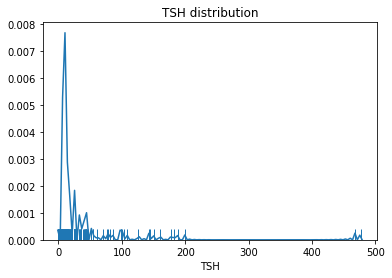

In [85]:
plt.title("TSH distribution")
sns.distplot(ex.TSH,hist=False,rug=True)

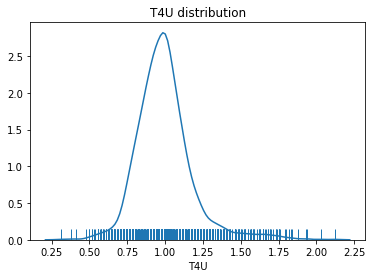

In [86]:
plt.title("T4U distribution")
sns.distplot(ex.T4U,hist=False,rug=True)

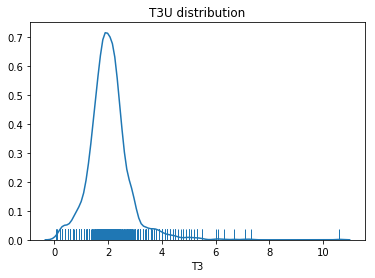

In [87]:
plt.title("T3U distribution")
sns.distplot(ex.T3,hist=False,rug=True)

In [88]:
fill_numeric_miss_values(data=ex,column="TSH", method= "mean")

MEAN  Value is: 4.501820448877802
Filling missing values by MEAN done!


In [89]:
fill_numeric_miss_values(data=ex,column="T4U", method= "mean")

MEAN  Value is: 0.9961103800468323
Filling missing values by MEAN done!


In [90]:
fill_numeric_miss_values(data=ex,column="T3", method= "mean")

MEAN  Value is: 2.034226507409644
Filling missing values by MEAN done!


In [91]:
ex.TSH = normalize_quantiles(column=ex.TSH.copy())

In [92]:
ex.T4U = normalize_quantiles(column=ex.T4U.copy())

In [93]:
ex.T3 = normalize_quantiles(column=ex.T3.copy())

### After normalization

In [94]:
ex.describe()

,TSH,T3,T4U
count,2237.000000,2237.000000,2237.000000
mean,2.139592,2.004334,0.984785
std,1.963390,0.429450,0.111676
min,0.030000,1.000000,0.750000
25%,0.770000,1.700000,0.910000
50%,1.600000,2.000000,0.990000
75%,2.900000,2.225830,1.040000
max,11.000000,3.200000,1.310000


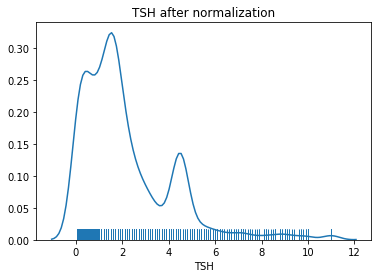

In [95]:
plt.title("TSH after normalization")
sns.distplot(ex.TSH,hist=False,rug=True)

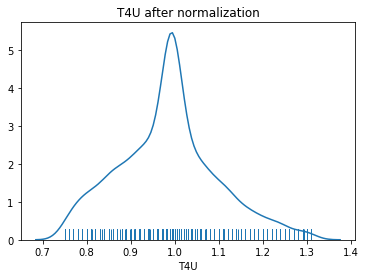

In [96]:
plt.title("T4U after normalization")
sns.distplot(ex.T4U,hist=False,rug=True)

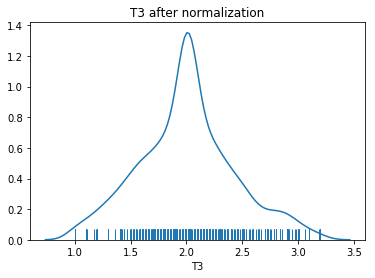

In [97]:
plt.title("T3 after normalization")
sns.distplot(ex.T3,hist=False,rug=True)

## The First hypothesis

The first hypothesis:    
>**Is there any correlation between TSH & T4U hormone levels?**  

Let's look at it using a **T test** on preprocessed data

Text(0.5,1,'TSH & T4U dependendies')

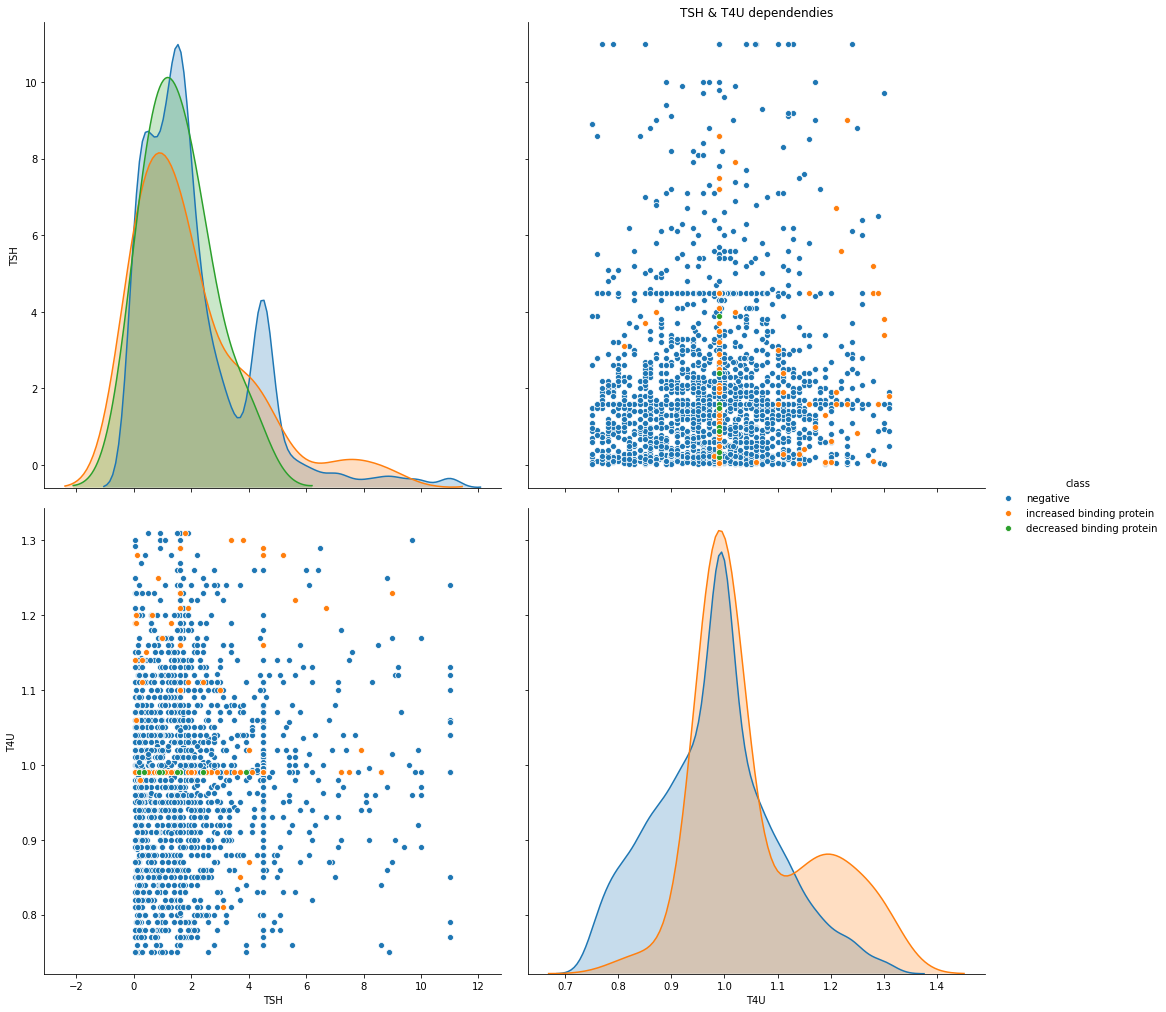

In [98]:
data = ex[["TSH","T4U", "class"]]
sns.pairplot(data,hue="class",height=7)
plt.title("TSH & T4U dependendies")

As we can see there are some **dependencies beetwen TSH and T4U**, mainly in increased and decreased binding protein. Pairplot clearly shows high levels of TSH and low levels of T4U which is called **hypothyroidis** and vice versa - **hyperthyroidis**.

As we suppose there is a correlation between hormones so we have to choose **paired T-test**. But first we need to check distribution of each levels.

***The hypothesis level of confidence is p = 0.05***

Text(0.5,1,'TSH QQ-plot')

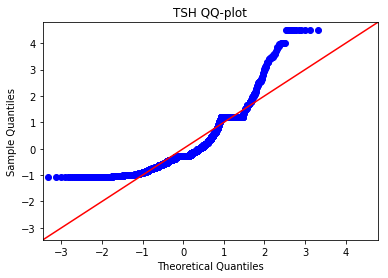

In [99]:
_= sm.ProbPlot(ex.TSH,fit=True).qqplot(line='45')
plt.title("TSH QQ-plot")

Text(0.5,1,'T4U QQ-plot')

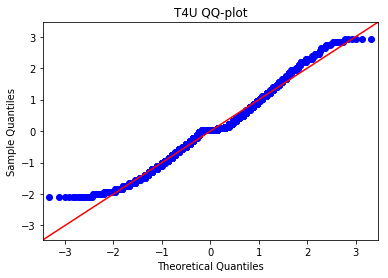

In [100]:
_ = sm.ProbPlot(ex.T4U, fit=True).qqplot(line='45')
plt.title("T4U QQ-plot")

In [101]:
#P value is very very low
stats.ttest_rel(a=ex.TSH,b=ex.T4U)

Ttest_relResult(statistic=27.862597649832473, pvalue=6.582074105486675e-147)

### The first hypothesis conclusion

So our hypothesis -> *the correlation between TSH & T4U* is **statistically significant** as result of p-value that is far less than 0.05  
It **holds true** same as in our **preliminary analysis**.

### Addition

Now we have proved **t-test** on our first hypothesis which is valid as it was in preliminary analysis, but the **point** is that filling missing values and normalization of outliers **may skew results**. It is obvious that current **p value is 1... ^ -146**, infinitesimal relative to former p-value which was **9.590380479920326 ^-53**. This is due to losing information that contains usually outliers. Despite the fact the hypothesis holds true, it turns out that using preprocessing techniques on our data result in more general and less various data we have.  
It is suitable when the outliers occurs almost never but inadmissible if there is some probability and it can lead to underfitting - failure to **learn relationships** in the training data.

# Conclusion

Speaking about conclusion to all our work until now, we may define a couple of significant points:
> **I.** We developed a couple of scripts, which are more or less universal to normalize raw data and to get rid of outliers in it.  
> **II.** We merged personal and medical datasets and got rid of duplicate values in the process, at the same time keeping the most of useful information in the remaining unduplicated record.  
> **III.** We cleansed and opened the JSON-formatted column to add all packed columns into the dataset, thus creating more possibilities for gathering statistical data.  
> **IV.** Also, some columns, like **education-num** and **pregnant**, required more specific and complex approach than our universal scripts, so we used more custom procedure to normalize them.  
> **V.** We created a procedure to predict missing hormone values, using linear regression for each possible pair of hormones (TT4, T4U, T3), except TSH (because of its relatively low positive/negative correlation with other hormones).  
> **VI.** And finally, we tested this normalized dataset using statistical approach as in the first stage of our project, in order to control whether or not our suggestions on normalizing are correct.  
